# Metrics for Binary Classification 

Follow _Introduction to Machine Learning_ [Chapter 5](https://github.com/amueller/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb) **Section 5.3.2 Metrics for Binary Classification** (p.283)

Binary classification:
- Accuracy
- Precision
- Recall
- Confusion matrix (TP, FP, TN, FN)
- f1 score
- classification report



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mglearn

## Kinds of errors

In binary classification we have two classes. The class we are after, we usually call the *positive* class, the other *negative* class.

In the heart disease dataset, we are trying to identify patients with heart disease. The *positive* class would be 'heart disease', *negative* class would be 'healthy'.

**Accuracy**, the default metric we have used so far, measures how often we correctly classified an actually *positive* sample as *positive* and an actually *negative* sample as *negative*. The ideal value is 1.

**False positive**: If we falsely label a sample as *positive* that in reality is *negative*. We say that a patient has heart disease, whereas in reality they do not.

**False negative**: If we falsely label a sample as *negative* that in reality is *positive*. We missed identifying a patient as having heart disease.

## Introduction to confusion matrix and derived metrics

Rows are actual, columns are predicted classes. The entries are:
- True negatives TN
- True posititives TP
- False positives FP
- False negatives FN

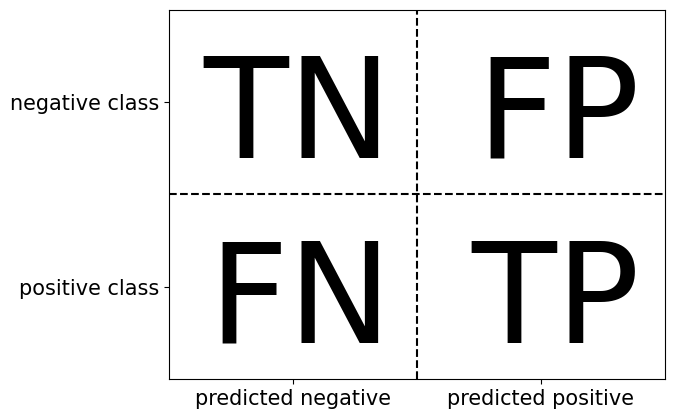

In [3]:
mglearn.plots.plot_binary_confusion_matrix()

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
np.random.seed(215)
y_true = np.random.choice(['healthy', 'sick'], 10)
y_true

array(['healthy', 'healthy', 'healthy', 'healthy', 'sick', 'sick',
       'healthy', 'sick', 'sick', 'healthy'], dtype='<U7')

In [6]:
#Generate some random predictions
y_pred = np.random.choice(['healthy', 'sick'], 10)
y_pred

array(['healthy', 'sick', 'sick', 'sick', 'sick', 'sick', 'sick', 'sick',
       'healthy', 'healthy'], dtype='<U7')

In [7]:
confusion_matrix(y_true, y_pred, labels=['healthy', 'sick'])

array([[2, 4],
       [1, 3]])

Text(113.9222222222222, 0.5, 'true value')

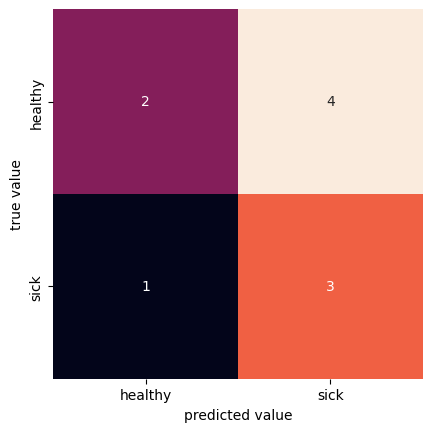

In [8]:
mat = confusion_matrix(y_true, y_pred, labels=['healthy', 'sick'])

sns.heatmap(mat, xticklabels=['healthy', 'sick'],  yticklabels=['healthy', 'sick'], square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [9]:
tn, fp, fn, tp = mat.ravel()

In [10]:
#Calculate accuracy manually
(tp+tn) / (tp+tn+fp+fn)

0.5

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.5

In [12]:
#Calculate precision manually
tp / (tp+fp)

0.42857142857142855

In [13]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, pos_label='sick')

0.42857142857142855

In [14]:
#Calculate recall manually
tp / (tp+fn)

0.75

In [15]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, pos_label='sick')

0.75

## Imbalanced datasets 

Accuracy might not be the best score for imbalanced datasets.

Let's see this on a _not nine_ - _nine_ classifier on the digits dataset.

A dummy classifier that always predicts the majority class (_not nine_) will achieve high accuracy.

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_val, y_train, y_val = train_test_split(
    digits.data, y, random_state=0)

In [17]:
X_train.shape

(1347, 64)

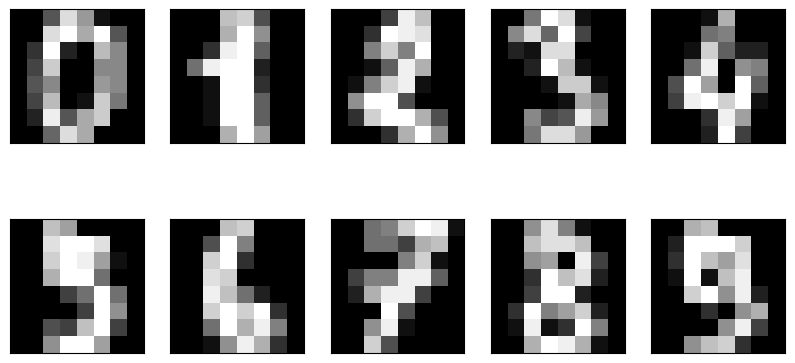

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')

In [19]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_val)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Validation score: {:.2f}".format(dummy_majority.score(X_val, y_val)))

Unique predicted labels: [False]
Validation score: 0.90


A decision tree does only slightly better, according to accuracy:

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_val)
print("Validation score: {:.2f}".format(tree.score(X_val, y_val)))

Validation score: 0.92


Comparing a _stratified_ dummy classifier to logistic regression:

In [21]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy="stratified").fit(X_train, y_train)
pred_dummy = dummy.predict(X_val)
print("dummy score: {:.2f}".format(dummy.score(X_val, y_val)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_val)
print("logreg score: {:.2f}".format(logreg.score(X_val, y_val)))

dummy score: 0.79
logreg score: 0.98


## Confusion matrices for above models
Confusion matrices provide more detailed information.

On the main diagonal, are the numbers of correctly predicted samples. The off-diagonal has the mistakes.

In [22]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_val, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


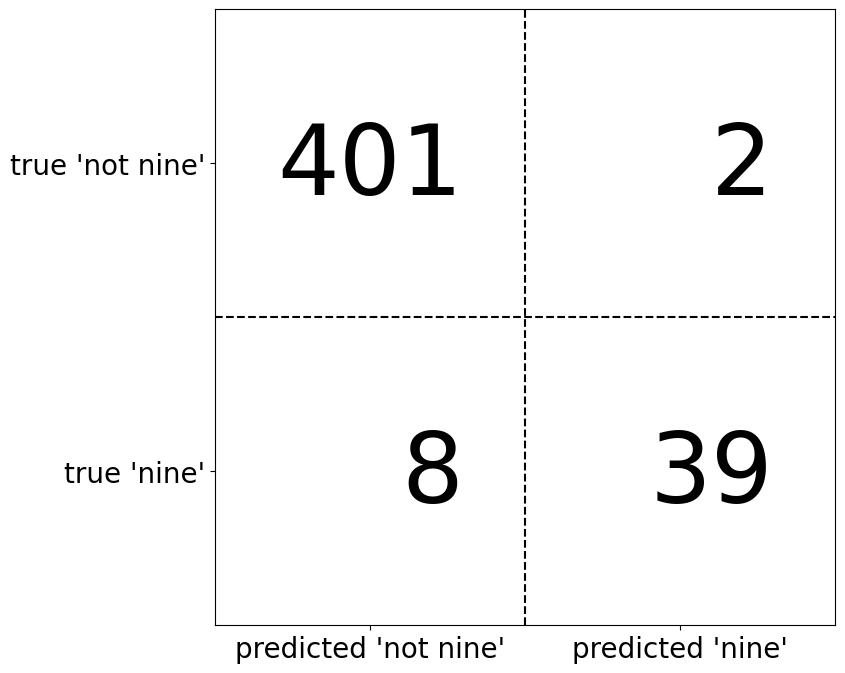

In [23]:
mglearn.plots.plot_confusion_matrix_illustration()

In [24]:
print("Most frequent class:")
print(confusion_matrix(y_val, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_val, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_val, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_val, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[359  44]
 [ 41   6]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


The flaw in the _most frequent_ dummy classifer is evident in the confusion matrix: predicted positive column is all zeroes, it always predicts the negative class.

## Accuracy, precision, recall, f1-score
Based on the confusion matrix, many summary metrics are computed. Here are the most important:

**Accuracy:** Using the diagonal. How often are we correct?

$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

**Precision:** Using the *predicted positive* column. How many of the samples predicted positive are actually positive? Ideal precision is 1.

$precision = \frac{TP}{TP+FP}$ 

**Recall:** Using the *positive class* row. How many actual positive samples do we catch? Ideal recall is 1.

$recall = \frac{TP}{TP+FN}$  

**_Note:_** For a given model, precision and recall are complementary. If the mistake is a false positive (FP) it cannot be a false negative (FN). As long as we make mistakes, we change the type of mistake. Hence, improving precision will reduce recall and vice-versa.

**F1-score:**

Combine precision and recall into one score:  
$f_1 = 2\cdot\frac{precision\cdot recall}{precision + recall}$



**Exercise:** For the following confusion matrices, calculate precision, recall and f1 scores:

```
Format of confusion matrices is:
[[TN  FP]
 [FN  TP]]

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[358  45]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]
```



**Answer:**
```
Format of confusion matrices is:
[[TN  FP]
 [FN  TP]]

Most frequent class:
[[403   0]
 [ 47   0]]

precision = 0 / (0 + 0) = NaN 
recall = 0 / (0+47) = 0
f1 = 2* NaN * 0 / (NaN+0) = 0 (or NaN?)

Dummy model:
[[358  45]
 [ 43   4]]

precision = 4 / (4 + 45) = 4/49 ~ 4/50 ~ 4*0.02 = 0.08
recall = 4 / (4+43) = 4/47 ~ 4/50 ~ 4*0.02 = 0.08
f1 = 2*4/49 *  4/47 / (4/49 +  4/47) ~ 2* 0.08 * 0.08 / (0.08+0.08) = 0.08

Decision tree:
[[390  13]
 [ 24  23]]

precision = 23 / (23 +13) = 23/36 ~ 2/3 = 0.66
recall = 23 / (23+24) = 23/47 ~ 1/2 = 0.5
f1 = 2*2/3 * 1/2 / (2/3 +1/2) ~ 2/3 / (4/6 + 3/6) ~ 4/6 / 7/6 = 4/7 ~ 4*0.14 = 0.56



Logistic Regression
[[402   1]
 [  6  41]]
 
 precision = 41 / (41 +1) ~ 39/40 = 0.975
recall = 41 / (41+6) ~ 40/50 = 0.8
f1 ~  0.9


 ```

### scikit-learn `f1_score()`

F1-score taking precision and recall into account is able to better distinguish between the above classifiers. It detects the flaws in both dummy classifiers

In [25]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_val, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_val, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_val, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_val, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.55
f1 score logistic regression: 0.92


## Classification report 

>The classification_report function produces one line per class (here, True and False) and reports precision, recall, and f-score with this class as the positive class. Before, we assumed the minority “nine” class was the positive class. If we change the positive class to “not nine,” we can see from the output of classification_report that we obtain an f-score of 0.94 with the most_frequent model. Furthermore, for the “not nine” class we have a recall of 1, as we classified all samples as “not nine.” The last column next to the f-score provides the support of each class, which simply means the number of samples in this class according to the ground truth.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_most_frequent,
                            target_names=["not nine", "nine"],
                           zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



>Three additional rows in the classification report show averages of the precision, recall, and f1-score. The macro average simply computes the average across the classes, while the weighted average computes a weighted average, weighted by the number of samples in the class. Because they are averages over both classes, these metrics don’t require a notion of positive class, and in contrast to just looking at precision or just looking at recall for the positive class, averaging over both classes provides a meaningful metric in a single number.

In [27]:
print(classification_report(y_val, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.12      0.13      0.12        47

    accuracy                           0.81       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.81      0.81       450



In [29]:
print(classification_report(y_val, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450

